### Finding Relationship Btw Variables

QUESTION:
    
     is the number of cylinders in a car (categorical predictor variables) 
        associated or related to the mileage of the car (quantitative target variable)?

In [1]:
#Loading the libraries

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [3]:
#Loading the data

data = pd.read_csv("data/auto-mpg.data", delim_whitespace=True, header=None, usecols=[0,1], names=['mpg', 'cylinders'], 

                   dtype={'mpg':np.float64, 'cylinders':'category'})

In [4]:
#View the data

data.head(n=3)

mpg cylinders
0  18.0         8
1  15.0         8
2  18.0         8

In [5]:
#Summary of the variable mpg

data.describe() #only summarize the numerical variables in the dataset

mpg
count  398.000000
mean    23.514573
std      7.815984
min      9.000000
25%     17.500000
50%     23.000000
75%     29.000000
max     46.600000

In [6]:
#Summary of the variable cylinders

data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

the categorical variable cylinders have five different levels with 3, 4, 5, 6 and 8 number of cylinders.

Null Hypothesis: 

    There is nothing going on between the variables, there is no relationship between the two variables cylinders and mpg. 
    
    In other words, it does not matter how many cylinders the car has to accurately to predict the mileage of the car, 
    the mean mpg for all the different levels of cylinders variable are same. 
    In mathematical terms

Alternate Hypothesis: 
    
    There is something going on between the predictor and target variable, or there is a relationship between the two. 
    In other words, the number of cylinders in car affects the mileage of the car, the mean mpg for different groups of cylinder variable or at least one group mean is different from the other group means. 
    But we don’t know which group mean is different, it might be a group with 3 number of cylinders or 4 number of cylinders or even with 8 number of cylinders. 

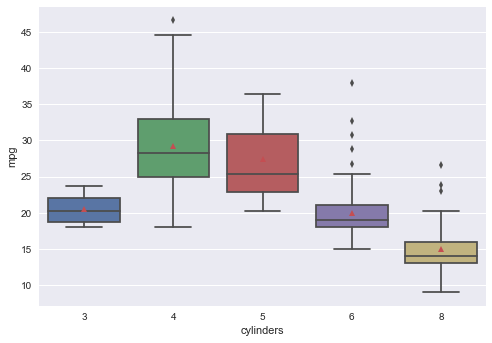

In [7]:
#Visualizing data

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['cylinders'], y=data['mpg'], showmeans=True)
plt.show()

In [8]:
#ANOVA F Test

model = smf.ols(formula='mpg ~ cylinders', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     172.6
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           3.68e-85
Time:                        18:39:08   Log-Likelihood:                -1180.8
No. Observations:                 398   AIC:                             2372.
Df Residuals:                     393   BIC:                             2392.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.5500      2.366      8.

### Check the value for the F-statistic and Prob (F-statistic) values.

F-statistic is very high at 172.6 with the very very low p-value. 


##### Higher F statistic implies a relationship between the variables. 

##### P-value is defined as the probability of getting that observed F-statistic (after the ANOVA test) or more extreme value of F-statistic provided the null hypothesis is true.

### Decision Time

We can reject our null hypothesis and conclude that there is a relationship :

between the categorical predictor variable cylinder (number of cylinders in the car) and 

quantitative target variable mpg (mileage of the car).